In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [21]:
df_telco = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_telco.iloc[:3, :11]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes


In [22]:
df_telco.iloc[:3, 11:]

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [23]:
df_telco.shape

(7043, 21)

## Transformação das Colunas em Colunas Numéricas

In [24]:
df_copy = df_telco.copy()
yes_no_cols = ['Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'PaperlessBilling', 'Churn']

In [25]:
for col in yes_no_cols:
    df_copy[col] = df_telco[col].replace({
                            'No': 0, 
                            'Yes': 1,
                            'No internet service': 0,
                            'No phone service': 0
                        })

In [26]:
df_copy['gender'] = df_telco['gender'].replace({
                                        'Female':0,
                                        'Male': 1
                                    })

In [27]:
df_copy['InternetService'] = df_telco['InternetService'].replace({
                                                            'No': 0,
                                                            'DSL': 1,
                                                            'Fiber optic': 2
                                                        })

In [28]:
df_copy['Contract'] = df_telco['Contract'].replace({
                                                'Month-to-month': 0,
                                                'One year': 1,
                                                'Two year': 2
                                            })

In [29]:
df_copy['PaymentMethod'] = df_telco['PaymentMethod'].replace({
                                                        'Electronic check': 0,
                                                        'Mailed check': 1,
                                                        'Bank transfer (automatic)': 2,
                                                        'Credit card (automatic)': 3
                                                    })

In [30]:
df_copy['TotalCharges'] = df_telco['TotalCharges'].replace({' ': 0}).apply(lambda x: float(x))

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18), object(1)
memory 

In [34]:
df_copy.hist(edgecolor='white', figsize=(20,20), grid=False);

ImportError: matplotlib is required for plotting.

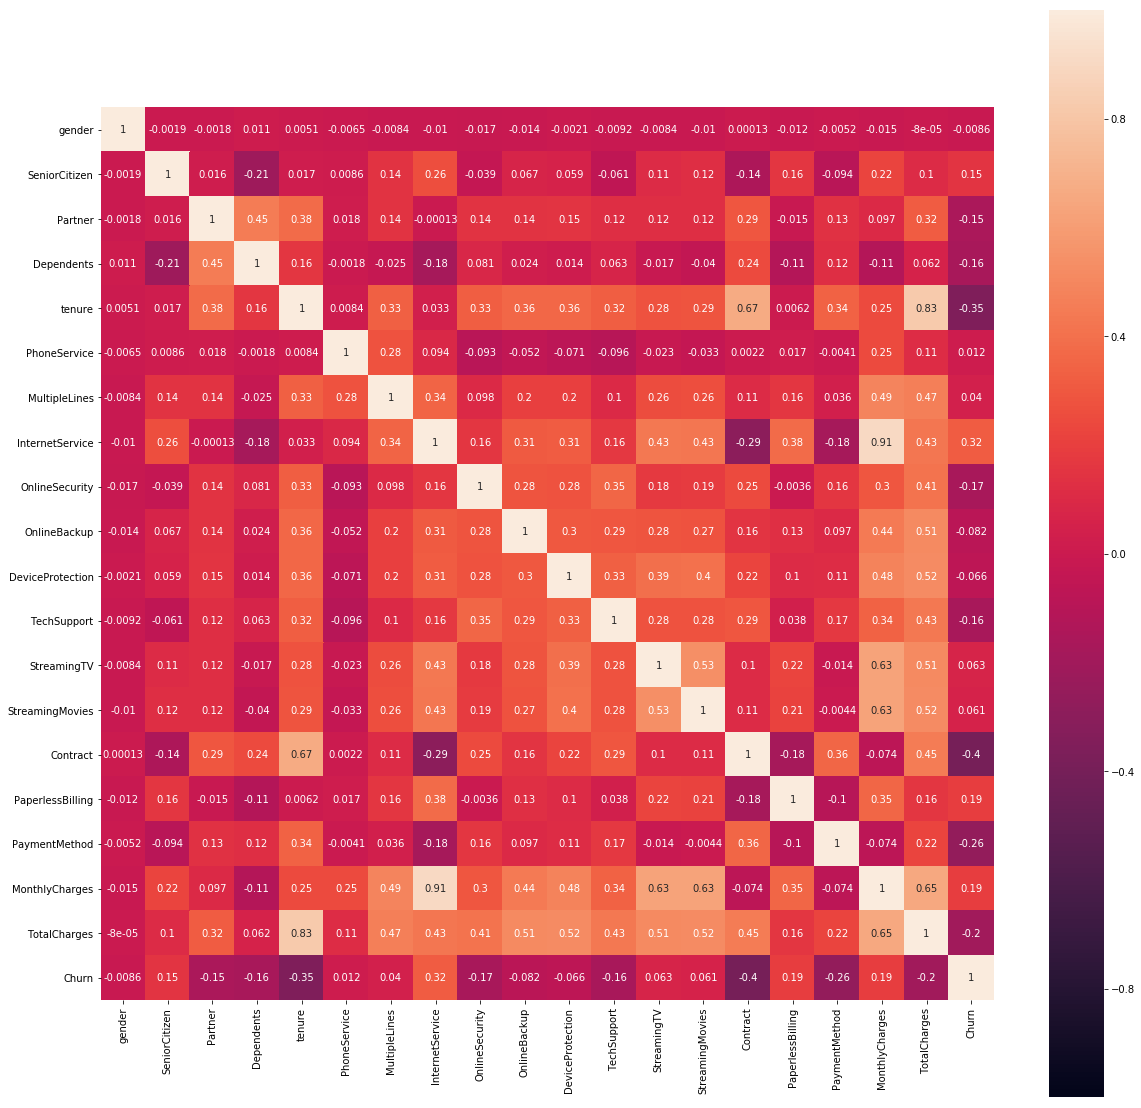

In [37]:
matriz_correlacao = df_copy.corr()
x, y = plt.subplots(figsize=(20,20))

sns.heatmap(
    matriz_correlacao,
    annot=True,
    square=True,
    vmax=1,
    vmin=-1
);

### Features Importances

In [38]:
features = list(df_copy.columns.drop(['Churn','customerID']))
target = 'Churn'


In [39]:
modelo = RandomForestClassifier()

modelo.fit(
    df_copy[features],
    df_copy[target]
);

In [40]:
pd.Series(modelo.feature_importances_, features).sort_values().plot(figsize=(20,7),kind='bar');

ImportError: matplotlib is required for plotting.

### Conclusões sobre as features importantes

- Os clientes perdidos pagavam uma mensalidade maior.

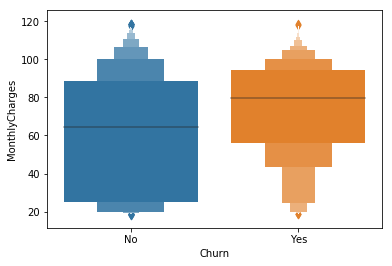

In [41]:
sns.boxenplot(y='MonthlyCharges', x='Churn', data=df_telco);

- Clientes com um maior um valor total tendem a ficar na empresa. 

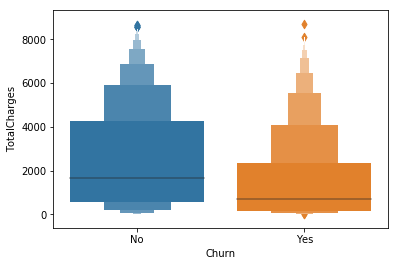

In [42]:
df_telco['TotalCharges'] = df_copy['TotalCharges']
sns.boxenplot(y='TotalCharges', x='Churn', data=df_telco);

 - O evento acima é provável pelos contratos, que gera um numero maior de mensalidades, e por isso um valor mais alto no  total.

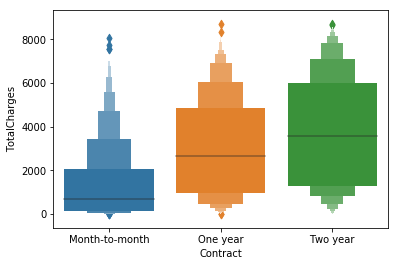

In [43]:
sns.boxenplot(y='TotalCharges', x='Contract', data=df_telco)

- Obviamente, os clientes que possuem contrato de um ou dois anos tendem a permanecer nos serviços. 

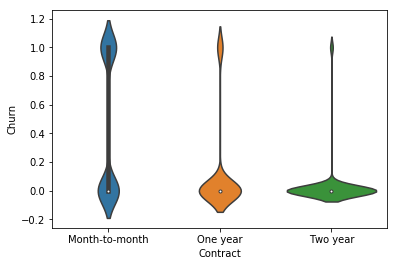

In [44]:
df = df_telco.copy()
df['Churn'] = df_copy['Churn']
sns.violinplot(x='Contract', y='Churn', data=df);

 - Como pode ser visto abaixo, existe uma grande perda dos clientes logo nos primeiros meses.

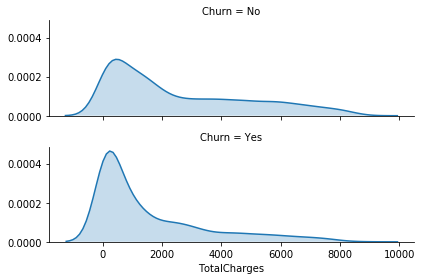

In [45]:
g = sns.FacetGrid(df_telco, row='Churn', height=2, aspect=3)
g.map(sns.distplot, 'TotalCharges', hist=False, kde_kws={'shade': True});

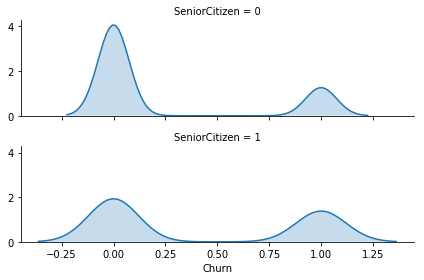

In [53]:
g = sns.FacetGrid(df_copy, row='SeniorCitizen', height=2, aspect=3)
g.map(sns.distplot, 'Churn', hist=False, kde_kws={'shade': True});

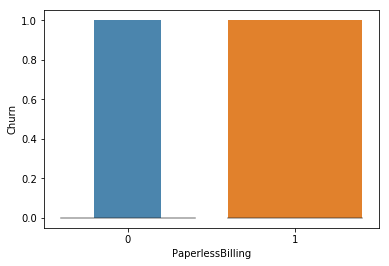

In [51]:
sns.boxenplot(y='Churn', x='PaperlessBilling', data=df_copy)

In [ ]:
for tipo in df_telco['InternetService']:
    df = df_telco[(df_telco['InternetService'] == tipo)]
    sns.barplot()